In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits
import scipy.stats as sc
%matplotlib inline
import Jared_function as ai

# A

In [2]:
data = np.genfromtxt('SUN_Velocity.txt')
time = data[:,0]-data[0][0] #sets the start time to 0
velocity = data[:,1]

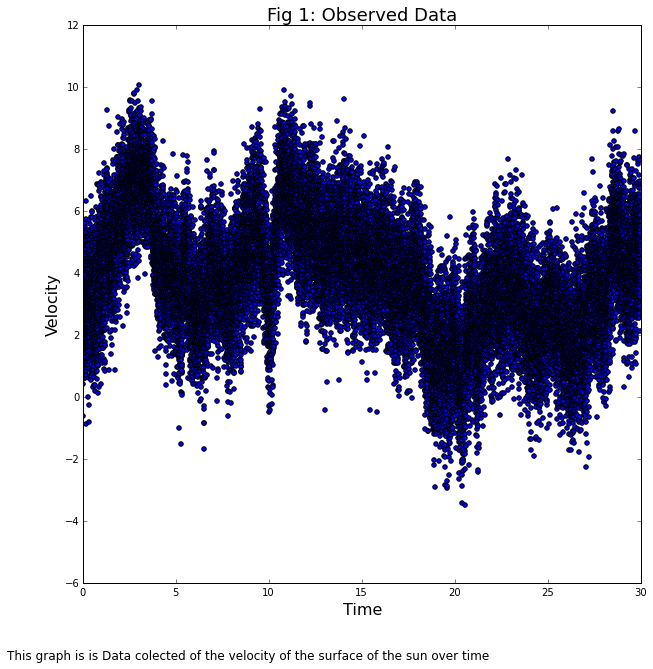


Pause



In [3]:
plt.figure(figsize=(10,10))
plt.figtext(.02, .02, "This graph is is Data colected of the velocity of the surface of the sun over time", fontsize = 12)
plt.scatter(time,velocity)
plt.xlim(0,max(time))
ai.figName('Fig 1: Observed Data','Time','Velocity')
plt.show()
ai.pause()

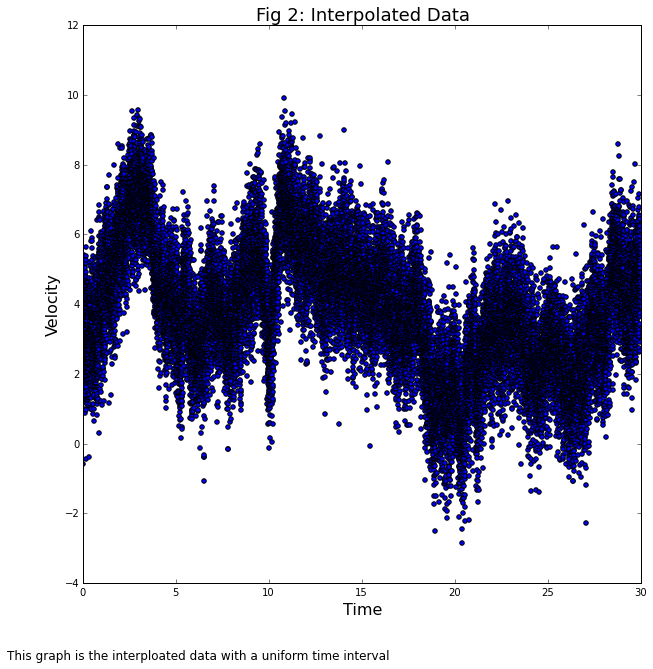


Pause



In [4]:
off = time[1:] - time[:len(time)-1]
timeN = np.arange(0,max(time),max(off))
velocityN = np.interp(timeN,time,velocity)
#the interplation of the data at uniform intervales
plt.figure(figsize=(10,10))
plt.figtext(.02, .02, "This graph is the interploated data with a uniform time interval", fontsize = 12)
plt.scatter(timeN,velocityN)
plt.xlim(0,max(time))
ai.figName('Fig 2: Interpolated Data','Time','Velocity')
plt.show()
ai.pause()

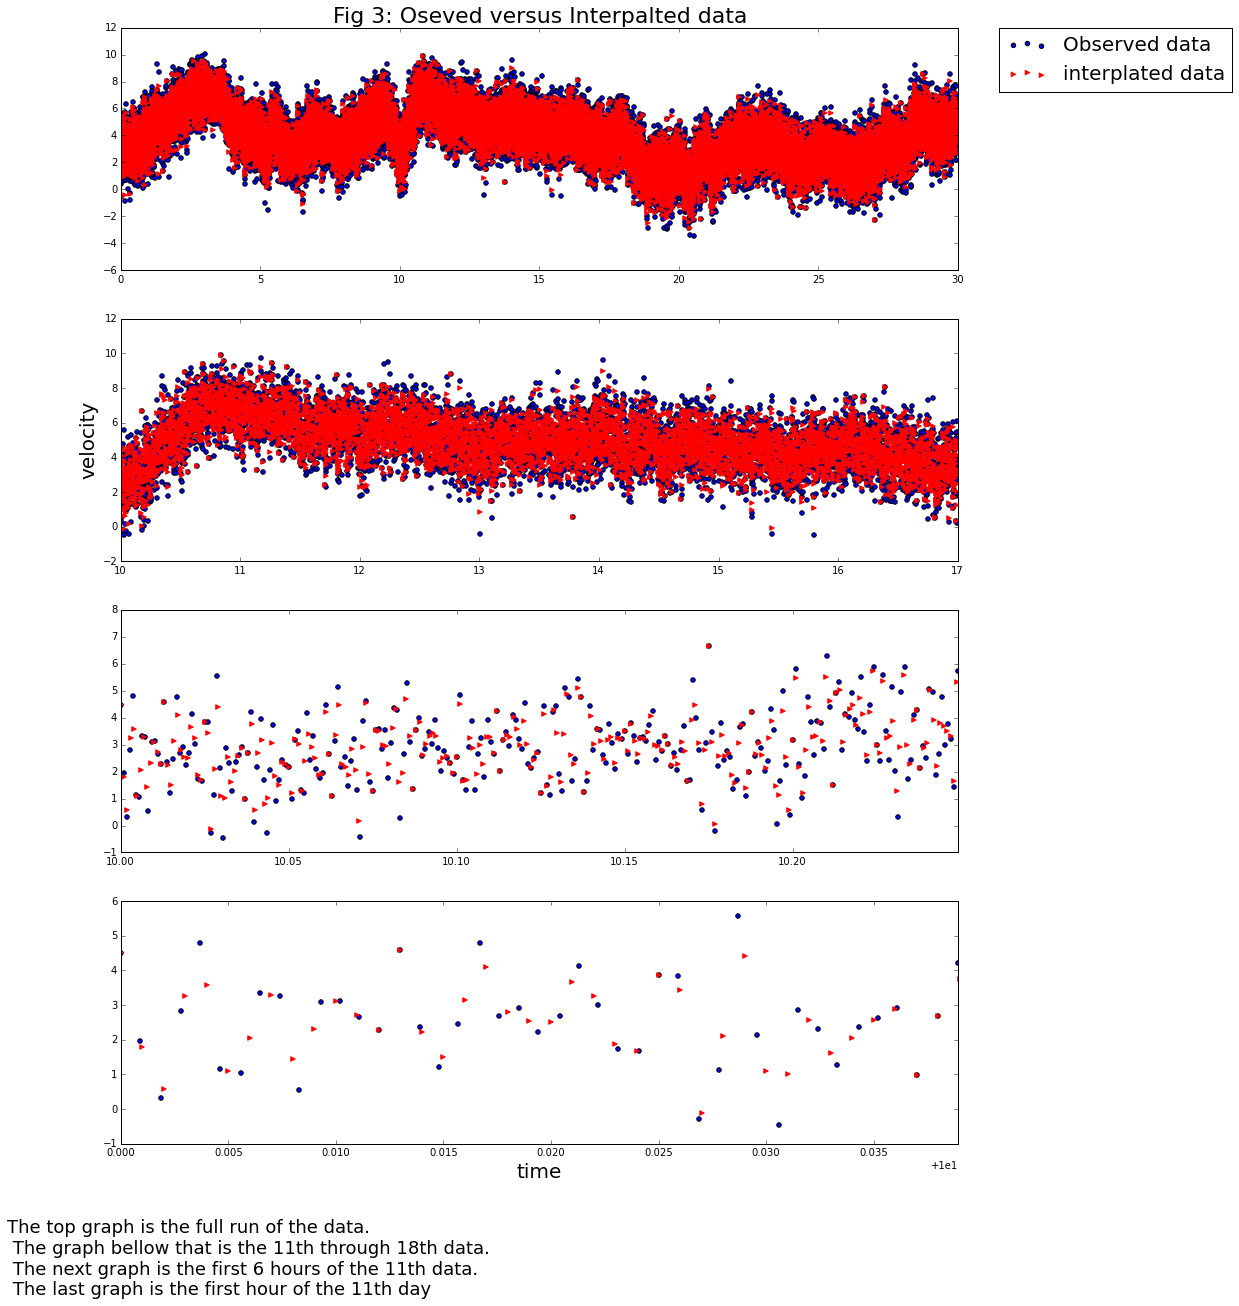


Pause



In [5]:
plt.figure(figsize=(20,10))
f, (ax1, ax2, ax3,ax4) = plt.subplots(4)
ax1.scatter(time,velocity, label = 'Observed data')
ax1.scatter(timeN,velocityN, color='r', marker ='>', label = 'interplated data')
ax1.set_xlim(0,max(time))
#
st = np.abs(time - 10.).argmin()
end = np.abs(time - 17.).argmin()
stN = np.abs(timeN - 10.).argmin()
endN = np.abs(timeN - 17.).argmin()
#finds the starting and end points for the 11 - 18 days 
ax2.scatter(time[st:end],velocity[st:end])
ax2.scatter(timeN[stN:endN],velocityN[stN:endN], color='r', marker ='>')
ax2.set_xlim(min(time[st:end]),max(time[st:end]))
#
st = np.abs(time - 10.).argmin()
end = np.abs(time - 10.25).argmin()
stN = np.abs(timeN - 10.).argmin()
endN = np.abs(timeN - 10.25).argmin()
#Finds the starting and end points for the 6 hours of the 11th day
ax3.scatter(time[st:end],velocity[st:end])
ax3.scatter(timeN[stN:endN],velocityN[stN:endN], color='r', marker ='>')
ax3.set_xlim(min(time[st:end]),max(time[st:end]))
#
st = np.abs(time - 10.).argmin()
end = np.abs(time - 10.04).argmin()
stN = np.abs(timeN - 10.).argmin()
endN = np.abs(timeN - 10.04).argmin()
#Finds the starting and end points for the first hour of the 11th day
ax4.scatter(time[st:end],velocity[st:end])
ax4.scatter(timeN[stN:endN],velocityN[stN:endN], color='r', marker ='>')
ax4.set_xlim(min(time[st:end]),max(time[st:end]))
#
f.set_figwidth(15)
f.set_figheight(20)
plt.figtext(.02, .02, "The top graph is the full run of the data.\n The graph bellow that is the 11th through 18th data.\n The next graph is the first 6 hours of the 11th data.\n The last graph is the first hour of the 11th day", fontsize = 18)
ax1.set_title('Fig 3: Oseved versus Interpalted data',fontsize = 22)
plt.xlabel("time",fontsize = 20)
ax2.set_ylabel("velocity",fontsize = 20)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size':20})
plt.show()
ai.pause()

In [6]:
stN = np.abs(timeN - 10.).argmin()
endN = np.abs(timeN - 17.).argmin()
timeN1 = timeN - sc.moment(timeN,1)
lt = ai.leastSquare(timeN, velocityN, np.ones(len(timeN)))
lt = lt[1]*timeN + lt[0]
velocityN1 = velocityN - sc.moment(velocityN,1) - lt
#
lt1 = ai.leastSquare(timeN[stN:endN], velocityN[stN:endN], np.ones(len(timeN[stN:endN])))
lt1 = lt1[1]*timeN[stN:endN] + lt1[0]
velocityN2 = velocityN[stN:endN] - sc.moment(velocityN[stN:endN],1) - lt1
#recalculated data without mean or linear trends
ai.pause()


Pause



# B

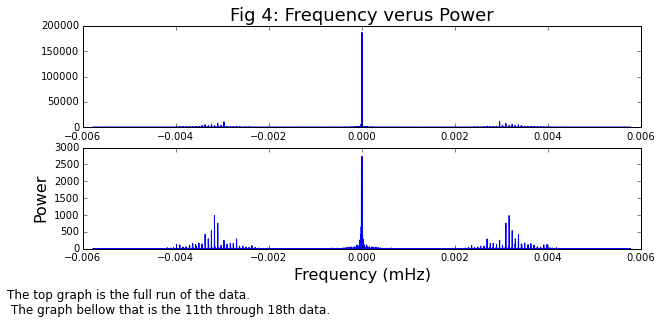


Pause



In [12]:
f, (ax1, ax2) = plt.subplots(2)
f.set_figwidth(10)
fouier = np.fft.fft(velocityN1)
Pow = (fouier * np.conjugate(fouier) * max(off)).real
freq = np.fft.fftfreq(Pow.size,max(off)*86400.)
#
fouier1 = np.fft.fft(velocityN2)
Pow1 = (fouier1 * np.conjugate(fouier1) * max(off)).real
freq1 = np.fft.fftfreq(Pow1.size,max(off)*86400.)
#
ax1.plot(freq,Pow)
ax2.plot(freq1,Pow1)
plt.figtext(.02, -.1, "The top graph is the full run of the data.\n The graph bellow that is the 11th through 18th data.", fontsize = 12)
ax1.set_title('Fig 4: Frequency verus Power',fontsize = 18)
plt.xlabel("Frequency (mHz)",fontsize = 16)
ax2.set_ylabel("Power",fontsize = 16)
plt.show()
ai.pause()

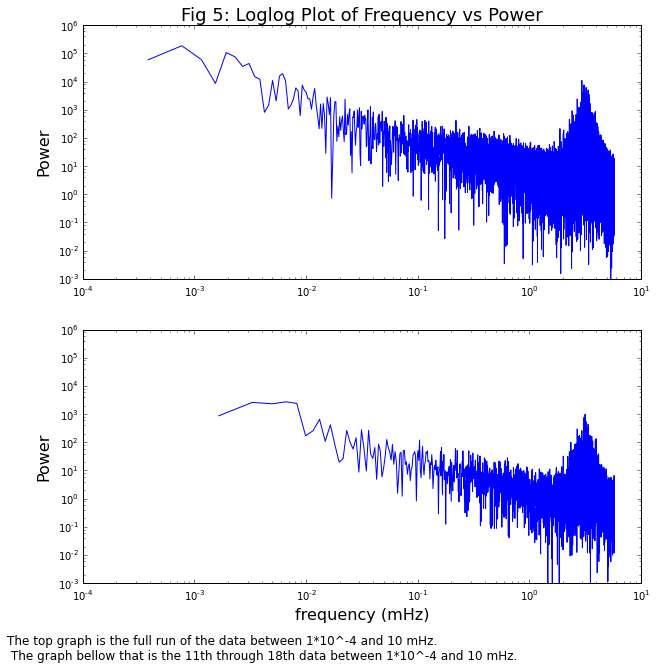


Pause



In [21]:
f, (ax1, ax2) = plt.subplots(2)
plt.figtext(.02, .02, "The top graph is the full run of the data between 1*10^-4 and 10 mHz.\n The graph bellow that is the 11th through 18th data between 1*10^-4 and 10 mHz.", fontsize = 12)
f.set_figwidth(10)
f.set_figheight(10)
Pow2 = Pow[freq > 0]
freq2 = (freq[freq > 0])
Pow3 = Pow1[freq1 > 0]
freq3 = (freq1[freq1 > 0])
ax1.loglog(freq2*1000.,Pow2)
ax2.loglog(freq3*1000.,Pow3)
ax1.set_xlim(1e-4,10)
ax1.set_ylim(1e-3,1e6)
ax2.set_xlim(1e-4,10)
ax2.set_ylim(1e-3,1e6)
plt.xlabel('frequency (mHz)', fontsize = 16)
ax1.set_ylabel('Power',fontsize = 16)
ax2.set_ylabel('Power',fontsize = 16)
ax1.set_title('Fig 5: Loglog Plot of Frequency vs Power',fontsize = 18)
plt.show()
ai.pause()

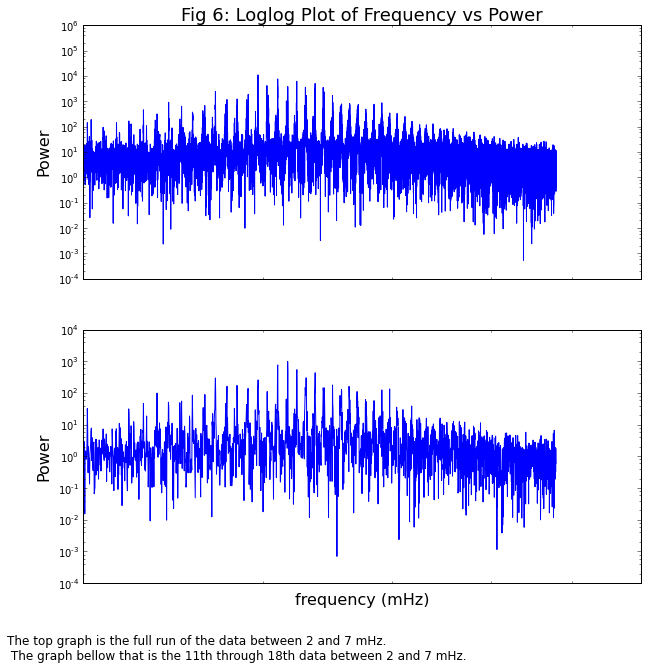


Pause



In [22]:
f, (ax1, ax2) = plt.subplots(2)
plt.figtext(.02, .02, "The top graph is the full run of the data between 2 and 7 mHz.\n The graph bellow that is the 11th through 18th data between 2 and 7 mHz.", fontsize = 12)
f.set_figwidth(10)
f.set_figheight(10)
ax1.loglog(freq2*1000,Pow2)
ax2.loglog(freq3*1000,Pow3)
ax1.set_xlim(2.,7.)
ax2.set_xlim(2.,7.)
plt.xlabel('frequency (mHz)', fontsize = 16)
ax1.set_ylabel('Power',fontsize = 16)
ax2.set_ylabel('Power',fontsize = 16)
ax1.set_title('Fig 6: Loglog Plot of Frequency vs Power',fontsize = 18)
plt.show()
ai.pause()

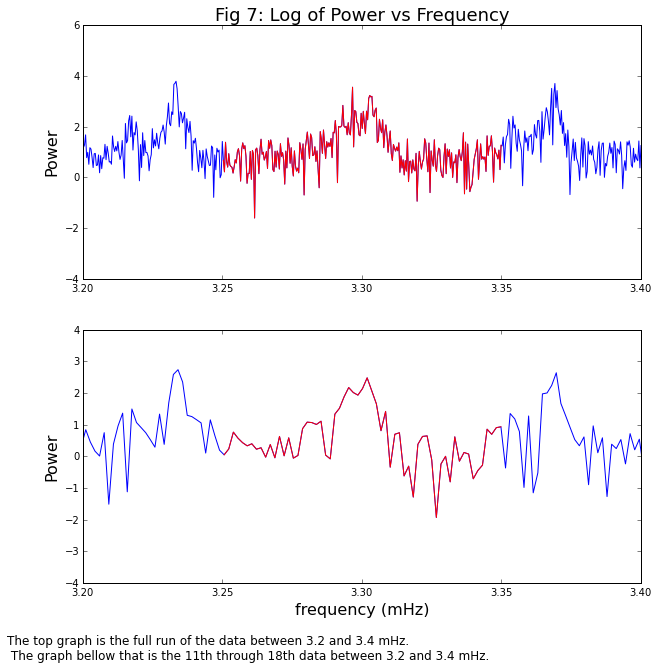


Pause



In [24]:
f, (ax1, ax2) = plt.subplots(2)
plt.figtext(.02, .02, "The top graph is the full run of the data between 3.2 and 3.4 mHz.\n The graph bellow that is the 11th through 18th data between 3.2 and 3.4 mHz.", fontsize = 12)
f.set_figwidth(10)
f.set_figheight(10)
freq4 = freq2[freq2*1000 > 3.25]
freq4 = freq4[freq4*1000 < 3.35]
Pow4 = Pow2[freq2*1000 > 3.25]
Pow4 = Pow4[freq4*1000< 3.35]
#
freq5 = freq3[freq3*1000 > 3.25]
freq5 = freq5[freq5*1000 < 3.35]
Pow5 = Pow3[freq3*1000 > 3.25]
Pow5 = Pow5[freq5*1000< 3.35]
#
ax1.plot(freq2*1000,np.log10(Pow2))
ax1.plot(freq4*1000,np.log10(Pow4), color = 'r')
ax2.plot(freq3*1000,np.log10(Pow3))
ax2.plot(freq5*1000,np.log10(Pow5), color = 'r')
ax1.set_xlim(3.2,3.4)
ax2.set_xlim(3.2,3.4)
plt.xlabel('frequency (mHz)', fontsize = 16)
ax1.set_ylabel('Power',fontsize = 16)
ax2.set_ylabel('Power',fontsize = 16)
ax1.set_title('Fig 7: Log of Power vs Frequency',fontsize = 18)
plt.show()
ai.pause()

In [25]:
freq6 = freq2[freq2*1000 > 3.29]
freq6 = freq6[freq6*1000 < 3.31]
Pow6 = Pow2[freq2*1000 > 3.29]
Pow6 = Pow6[freq6*1000< 3.31]
#
freq7 = freq3[freq3*1000 > 3.29]
freq7 = freq7[freq7*1000 < 3.31]
Pow7 = Pow3[freq3*1000 > 3.29]
Pow7 = Pow7[freq7*1000< 3.31]
#
mu1 = np.mean(Pow6)
var1 = sc.moment(Pow6, 2)
mu2 = np.mean(Pow7)
var2 = sc.moment(Pow7, 2)
#
top1 = np.sum((Pow6 - mu1)**2)
top2 = np.sum((Pow7 - mu2)**2)
#
chi1 = top1/var1
chi2 = top2/var2
#
print 'chi every day:',chi1 
print 'chi 11-18:',chi2
probablity1 = sc.chi2.cdf(chi1,len(Pow6)-2)
probablity2 = sc.chi2.cdf(chi2,len(Pow7)-2)
print 'probablity every day:',probablity1
print 'probablity 11-18:', probablity2
ai.pause()

chi every day: 52.0
chi 11-18: 12.0
probablity every day: 0.60407343
probablity 11-18: 0.714943499683

Pause



In [26]:
freq8 = freq2[freq2*1000 > 3.3124]
freq8 = freq8[freq8*1000 < 3.325]
Pow8 = Pow2[freq2*1000 > 3.3124]
Pow8 = Pow8[freq8*1000< 3.325]
#
freq9 = freq3[freq3*1000 > 3.3124]
freq9 = freq9[freq9*1000 < 3.325]
Pow9 = Pow3[freq3*1000 > 3.3124]
Pow9 = Pow9[freq9*1000< 3.325]
#
mu3 = np.mean(Pow8)
var3 = sc.moment(Pow8, 2)
mu4 = np.mean(Pow9)
var4 = sc.moment(Pow9, 2)
#
top3 = np.sum((Pow8 - mu3)**2)
top4 = np.sum((Pow9 - mu4)**2)
#
chi3 = top3/var3
chi4 = top4/var4
#
print 'chi every day:',chi3 
print 'chi 11-18:',chi4
probablity3 = sc.chi2.cdf(chi3,len(Pow8)-2)
probablity4 = sc.chi2.cdf(chi4,len(Pow9)-2)
print 'probablity every day:',probablity3
print 'probablity 11-18:', probablity4
ai.pause()

chi every day: 33.0
chi 11-18: 7.0
probablity every day: 0.630465205445
probablity 11-18: 0.779359692063

Pause

